# **EDA on Yahoo Finance Dataset**

In [ ]:
#!pip install yfinance pandas numpy matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch historical data for a specific company (e.g., Apple)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200


In [ ]:
# Fetch company info
company_info = yf.Ticker(ticker).info

# Display sector and industry
sector = company_info.get('sector', 'N/A')
industry = company_info.get('industry', 'N/A')
print(f"Sector: {sector}")
print(f"Industry: {industry}")


Sector: Technology
Industry: Consumer Electronics


In [ ]:
# Fetch financial statements
ticker_obj = yf.Ticker(ticker)
financials = ticker_obj.financials
balance_sheet = ticker_obj.balance_sheet
cash_flow = ticker_obj.cashflow

# Display financial statements
print("\nIncome Statement:")
print(financials.head())

print("\nBalance Sheet:")
print(balance_sheet.head())

print("\nCash Flow Statement:")
print(cash_flow.head())



Income Statement:
                                                        2023-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.147   
Normalized EBITDA                                   129188000000.0   
Net Income From Continuing Operation Net Minori...   96995000000.0   
Reconciled Depreciation                              11519000000.0   

                                                        2022-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.162   
Normalized EBITDA                                   133138000000.0   
Net Income From Continuing Operation Net Minori...   99803000000.0   
Reconciled Depreciation                              11104000000.0   

                                                        2021-09-30  \
Tax Effect Of Unusual Items                                    0.0   

In [ ]:
# Extract key financial ratios
key_ratios = {
    'Market Cap': company_info.get('marketCap'),
    'P/E Ratio': company_info.get('trailingPE'),
    'Dividend Yield': company_info.get('dividendYield'),
    'Beta': company_info.get('beta'),
    '52-Week High': company_info.get('fiftyTwoWeekHigh'),
    '52-Week Low': company_info.get('fiftyTwoWeekLow'),
    'EPS': company_info.get('earningsPerShare'),
    'Price-to-Book Ratio': company_info.get('priceToBook'),
    'Debt-to-Equity Ratio': company_info.get('debtToEquity')
}

key_ratios_df = pd.DataFrame([key_ratios])
print("\nKey Financial Ratios:")
print(key_ratios_df)



Key Financial Ratios:
      Market Cap  P/E Ratio  Dividend Yield   Beta  52-Week High  52-Week Low  \
0  3181762052096   31.85236          0.0048  1.244        237.23       164.08   

    EPS  Price-to-Book Ratio  Debt-to-Equity Ratio  
0  None            47.756733               151.862  


In [ ]:
# Fetch historical data
historical_data = ticker_obj.history(period='1y')

# Calculate moving averages
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()
historical_data['SMA_200'] = historical_data['Close'].rolling(window=200).mean()

# Display technical indicators
print("\nTechnical Indicators:")
print(historical_data[['Close', 'SMA_50', 'SMA_200']].head())



Technical Indicators:
                                Close  SMA_50  SMA_200
Date                                                  
2023-08-07 00:00:00-04:00  177.905197     NaN      NaN
2023-08-08 00:00:00-04:00  178.850174     NaN      NaN
2023-08-09 00:00:00-04:00  177.248688     NaN      NaN
2023-08-10 00:00:00-04:00  177.029846     NaN      NaN
2023-08-11 00:00:00-04:00  177.089600     NaN      NaN


In [ ]:
# Fetch dividend data
dividends = ticker_obj.dividends

# Display dividend data
print("\nDividend Data:")
print(dividends.head())



Dividend Data:
Date
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
2024-02-09 00:00:00-05:00    0.24
2024-05-10 00:00:00-04:00    0.25
Name: Dividends, dtype: float64


In [ ]:
# Fetch stock splits
splits = ticker_obj.splits

# Display splits data
print("\nSplits and Corporate Actions:")
print(splits.head())



Splits and Corporate Actions:
Series([], Name: Stock Splits, dtype: float64)


In [ ]:
# Summary statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    140.675507   142.321389   139.143536   140.808131   139.024960   
std      33.310018    33.430571    33.179199    33.313857    33.615818   
min      57.020000    57.125000    53.152500    56.092499    54.632896   
25%     123.682503   125.030003   122.157499   123.592501   121.328175   
50%     145.540001   147.264999   144.120003   145.860001   143.920898   
75%     166.302498   168.147503   164.815002   166.214996   164.457195   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  1.006000e+03  
mean   9.895211e+07  
std    5.439653e+07  
min    2.404830e+07  
25%    6.407675e+07  
50%    8.467540e+07  
75%    1.155069e+08  
max    4.265100e+08  


In [ ]:
# Check for missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch sector and industry info for each ticker
def get_company_info(ticker):
    try:
        info = yf.Ticker(ticker).info
        return {
            'Ticker': ticker,
            'Sector': info.get('sector', 'N/A'),
            'Industry': info.get('industry', 'N/A')
        }
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")
        return None

# Apply function to all tickers
data = [get_company_info(ticker) for ticker in tickers]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Ticker                  Sector                        Industry
0   AAPL              Technology            Consumer Electronics
1   MSFT              Technology       Software - Infrastructure
2  GOOGL  Communication Services  Internet Content & Information
3   AMZN       Consumer Cyclical                 Internet Retail
4   TSLA       Consumer Cyclical              Auto Manufacturers


## **Visualizations**

### **Line Plot**

(Closing prices over time)

## **Stacked Bar Chart**

[*********************100%%**********************]  1 of 1 completed


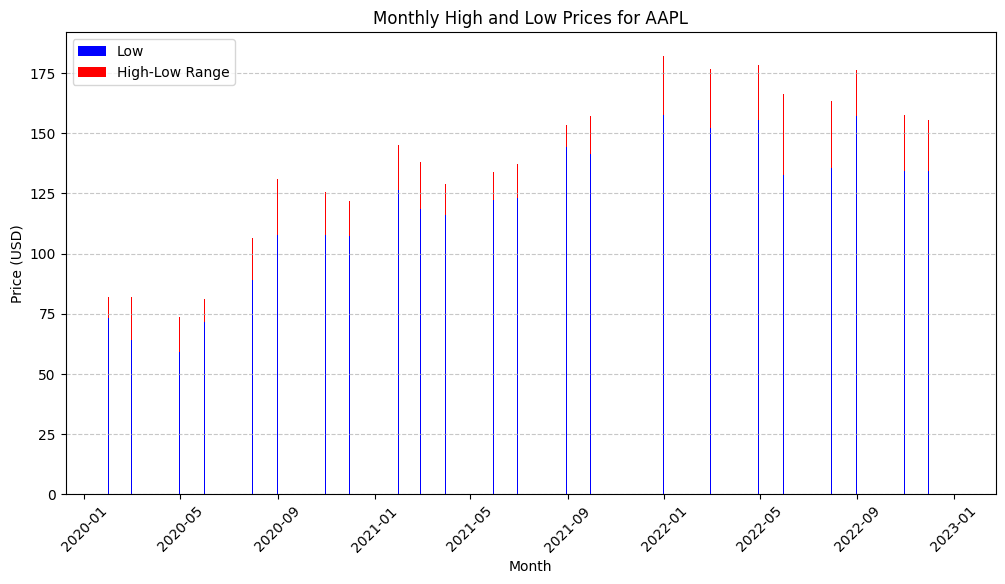

In [ ]:

# Resample to get monthly high and low prices
monthly_high = data['High'].resample('M').max()
monthly_low = data['Low'].resample('M').min()

# Calculate the difference (range) between high and low prices
monthly_range = monthly_high - monthly_low

# Plotting stacked bar chart
plt.figure(figsize=(12, 6))

bar_width = 90
# Base bars (low prices)
plt.bar(monthly_low.index, monthly_low, color='blue', label='Low')

# Stacked bars (high-low range)
plt.bar(monthly_high.index, monthly_range, bottom=monthly_low, color='red', label='High-Low Range')

plt.title('Monthly High and Low Prices for AAPL')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Grouped Bar Chart**

[*********************100%%**********************]  1 of 1 completed


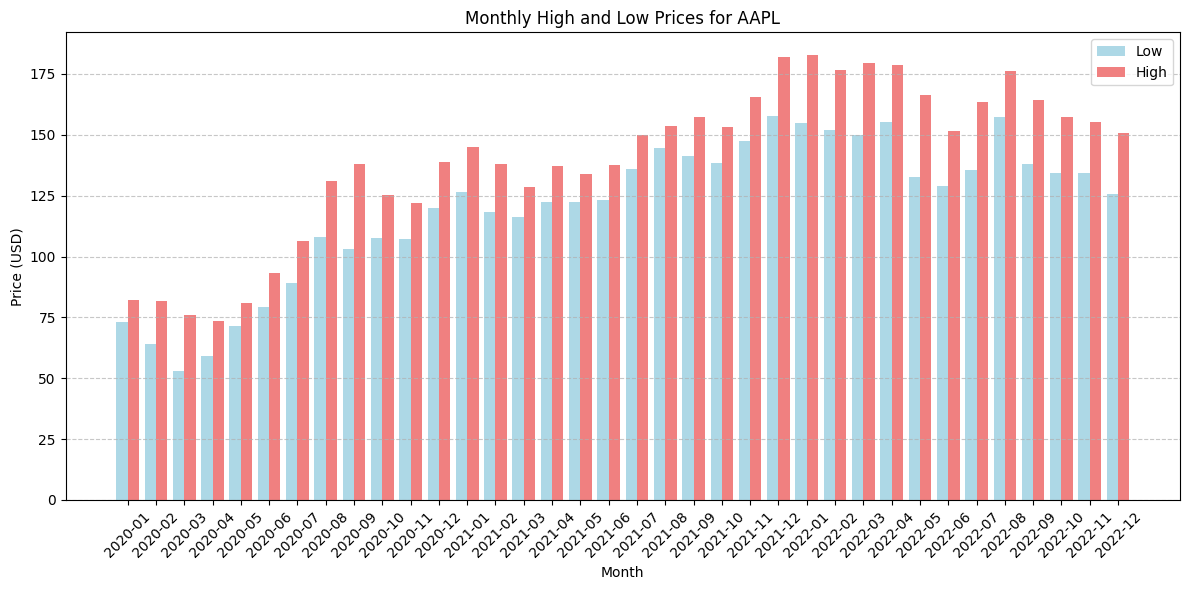

In [ ]:

# Resample to get monthly high and low prices
monthly_high = data['High'].resample('M').max()
monthly_low = data['Low'].resample('M').min()

# Set bar width and positions
bar_width = 0.4  # Width of each bar
index = np.arange(len(monthly_high))  # Position of bars on x-axis

# Plotting grouped bar chart
plt.figure(figsize=(12, 6))

# Plot low prices
plt.bar(index - bar_width/2, monthly_low, bar_width, color='lightblue', label='Low')

# Plot high prices
plt.bar(index + bar_width/2, monthly_high, bar_width, color='lightcoral', label='High')

# Formatting the plot
plt.title('Monthly High and Low Prices for AAPL')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.xticks(index, monthly_high.index.strftime('%Y-%m'), rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## **Histogram**

[*********************100%%**********************]  1 of 1 completed


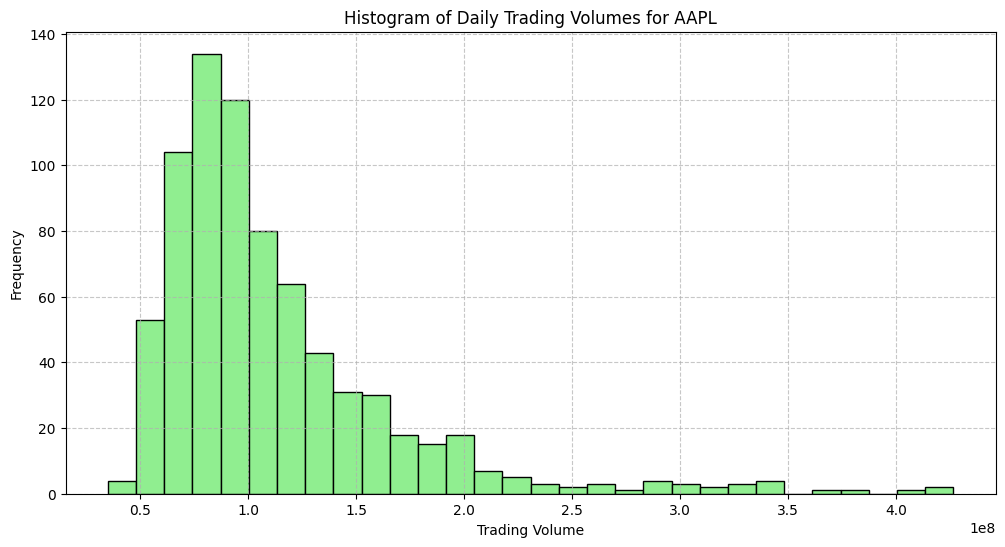

In [ ]:

# Extract the trading volumes
trading_volumes = data['Volume']

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(trading_volumes, bins=30, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Histogram of Daily Trading Volumes for AAPL')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## **Box Plot**

[*********************100%%**********************]  1 of 1 completed


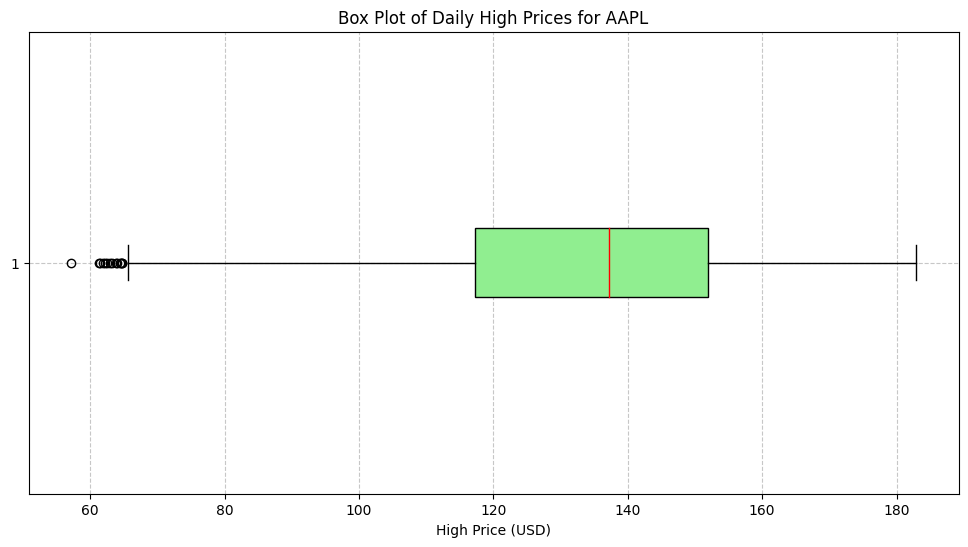

In [ ]:

# Extract the high prices
high_prices = data['High']

# Plotting the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(high_prices, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black'),
            medianprops=dict(color='red'))

# Adding title and labels
plt.title('Box Plot of Daily High Prices for AAPL')
plt.xlabel('High Price (USD)')

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


[*********************100%%**********************]  1 of 1 completed


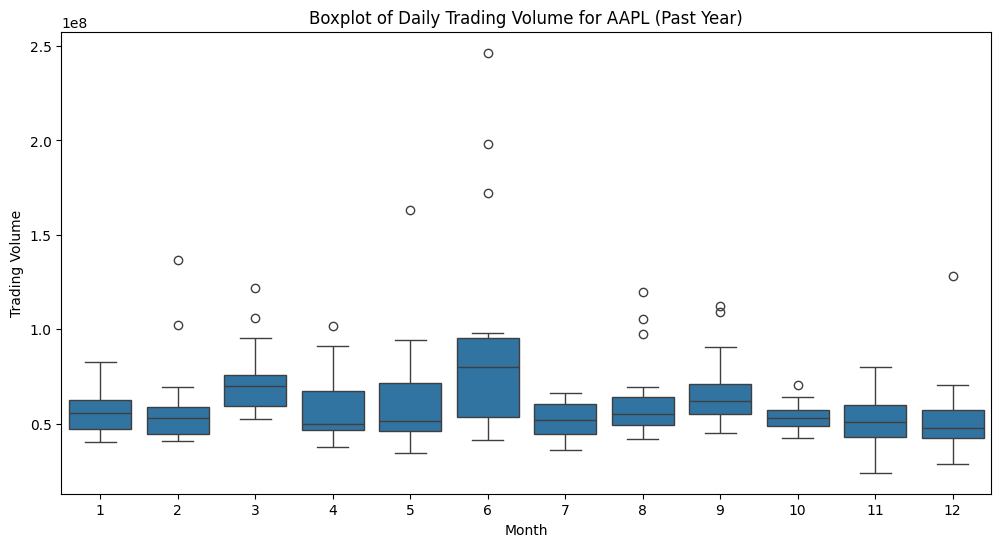

In [ ]:
import seaborn as sns

# Download AAPL data for the past year
data = yf.download('AAPL', period='1y')

# Create a boxplot of daily trading volume
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['Volume'])
plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.title('Boxplot of Daily Trading Volume for AAPL')
plt.show()


[*********************100%%**********************]  1 of 1 completed


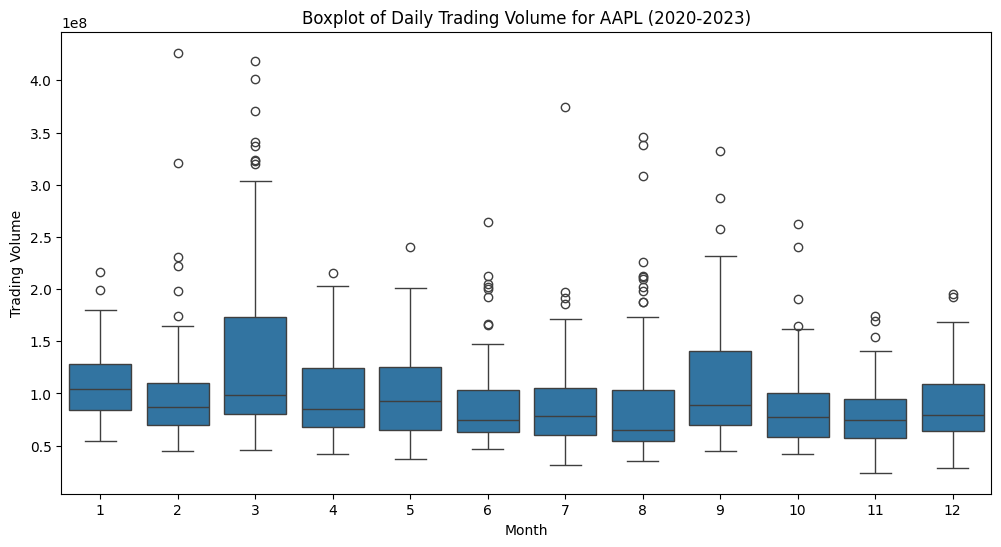

In [ ]:

# Download AAPL data from 2020 to 2023
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')

# Create a boxplot of daily trading volume
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['Volume'])
plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.title('Boxplot of Daily Trading Volume for AAPL (2020-2023)')
plt.show()


[*********************100%%**********************]  1 of 1 completed


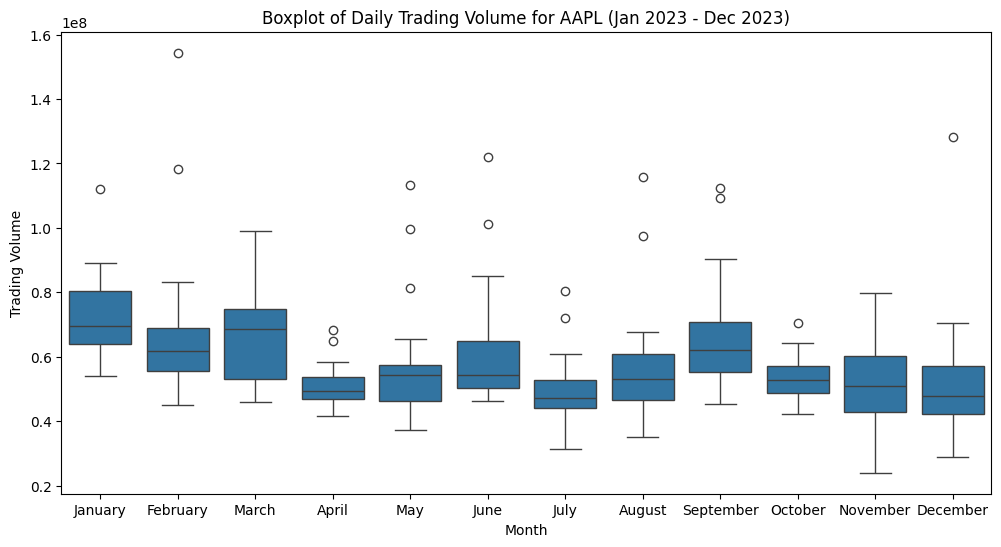

In [ ]:

import calendar

# Download AAPL data from January 2023 to December 2023
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Create a boxplot of daily trading volume
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['Volume'])
plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.title('Boxplot of Daily Trading Volume for AAPL (Jan 2023 - Dec 2023)')

# Set x-ticks to show month names
plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])

plt.show()


## **Scatter Plot**

[*********************100%%**********************]  1 of 1 completed


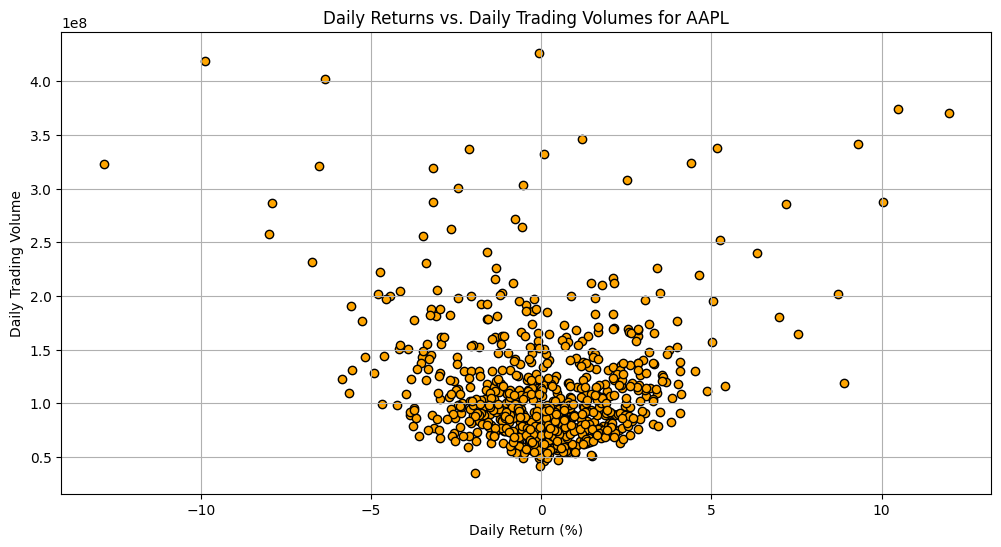

In [ ]:

# Calculate daily returns
daily_returns = data['Close'].pct_change() * 100
trading_volumes = data['Volume']

# Drop NaN values created by pct_change()
daily_returns = daily_returns.dropna()
trading_volumes = trading_volumes.loc[daily_returns.index]

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(daily_returns, trading_volumes, color='orange', edgecolor='black')

# Adding title and labels
plt.title('Daily Returns vs. Daily Trading Volumes for AAPL')
plt.xlabel('Daily Return (%)')
plt.ylabel('Daily Trading Volume')

# Displaying the plot
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


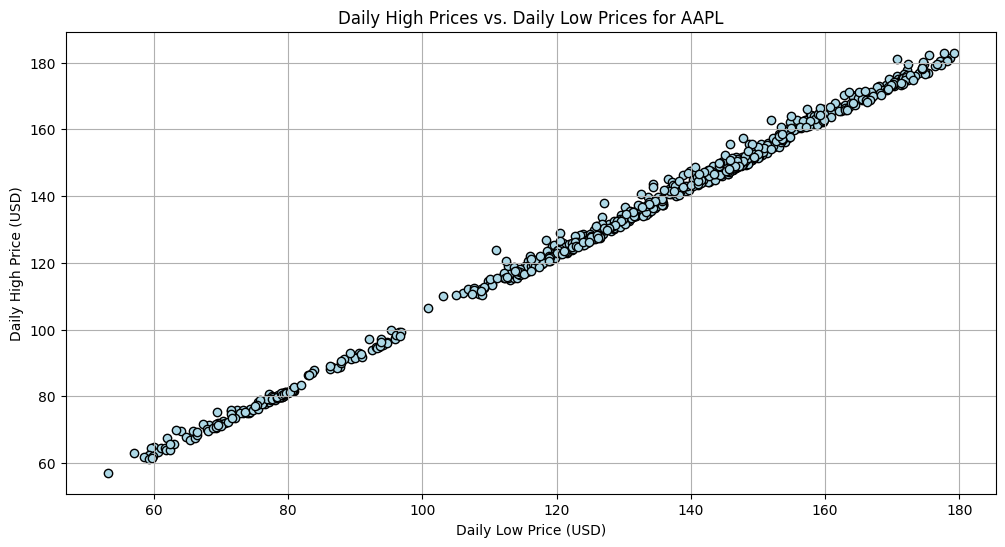

In [ ]:

# Extract high and low prices
high_prices = data['High']
low_prices = data['Low']

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(low_prices, high_prices, color='lightblue', edgecolor='black')

# Adding title and labels
plt.title('Daily High Prices vs. Daily Low Prices for AAPL')
plt.xlabel('Daily Low Price (USD)')
plt.ylabel('Daily High Price (USD)')

# Displaying the plot
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


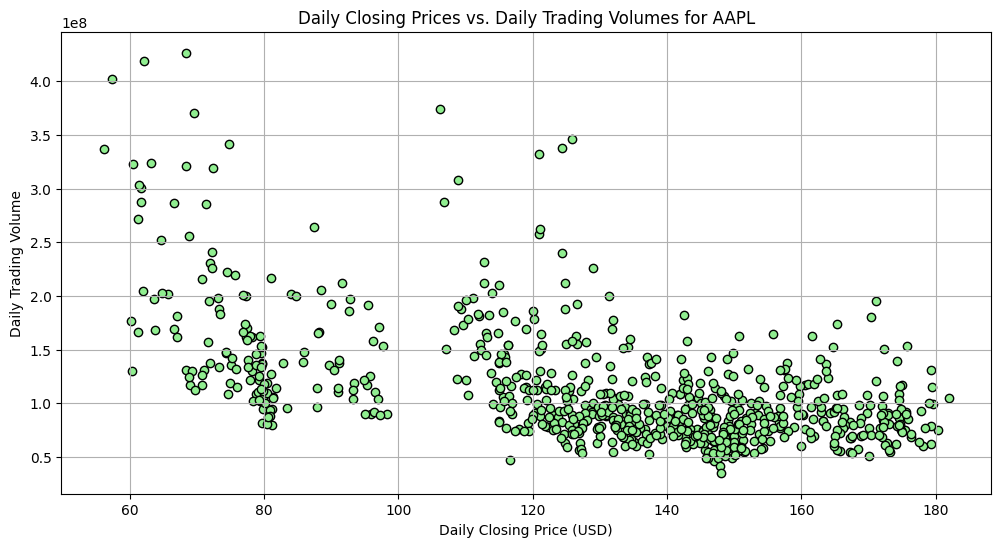

In [ ]:

# Extract closing prices and trading volumes
closing_prices = data['Close']
trading_volumes = data['Volume']

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(closing_prices, trading_volumes, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Daily Closing Prices vs. Daily Trading Volumes for AAPL')
plt.xlabel('Daily Closing Price (USD)')
plt.ylabel('Daily Trading Volume')

# Displaying the plot
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


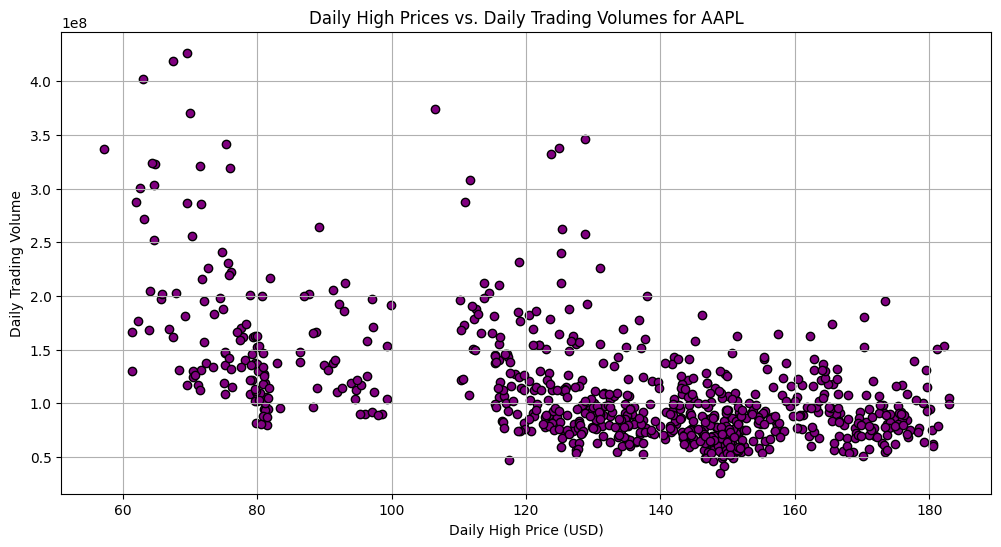

In [ ]:

# Extract high prices and trading volumes
high_prices = data['High']
trading_volumes = data['Volume']

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(high_prices, trading_volumes, color='purple', edgecolor='black')

# Adding title and labels
plt.title('Daily High Prices vs. Daily Trading Volumes for AAPL')
plt.xlabel('Daily High Price (USD)')
plt.ylabel('Daily Trading Volume')

# Displaying the plot
plt.grid(True)
plt.show()


## **Bubble Chart**

[*********************100%%**********************]  1 of 1 completed


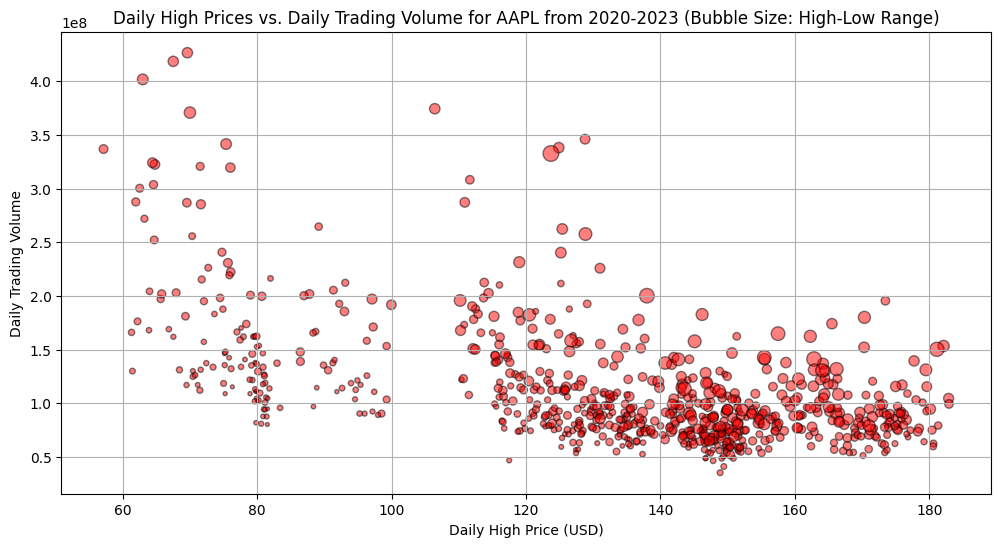

In [ ]:

# Extract data
high_prices = data['High']
low_prices = data['Low']
trading_volumes = data['Volume']
high_low_range = high_prices - low_prices

# Plotting the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(high_prices, trading_volumes, s=high_low_range * 10, alpha=0.5, c='red', edgecolor='black')

# Adding title and labels
plt.title('Daily High Prices vs. Daily Trading Volume for AAPL from 2020-2023 (Bubble Size: High-Low Range)')
plt.xlabel('Daily High Price (USD)')
plt.ylabel('Daily Trading Volume')

# Displaying the plot
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


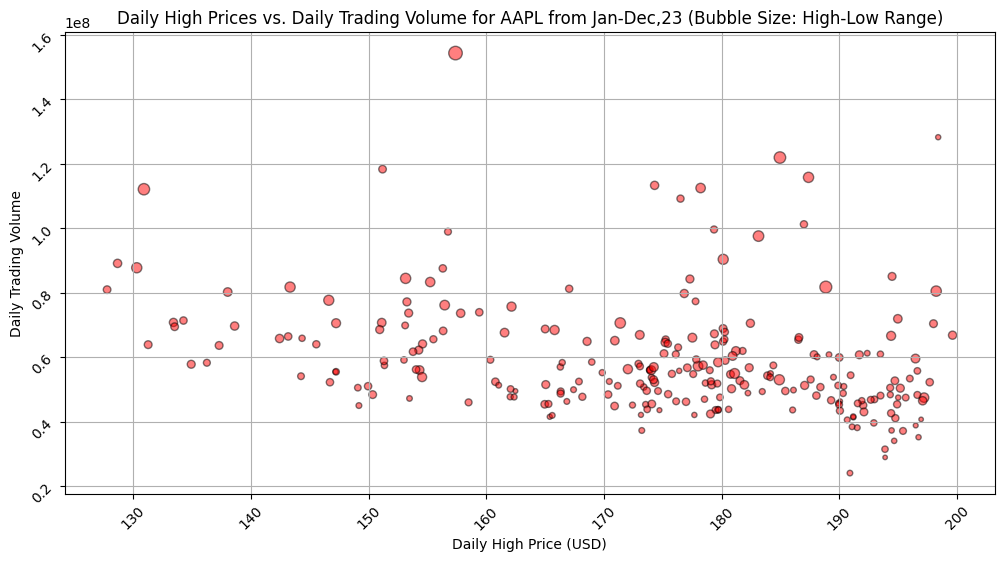

In [ ]:

# Extract data
high_prices = data['High']
low_prices = data['Low']
trading_volumes = data['Volume']
high_low_range = high_prices - low_prices

# Plotting the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(high_prices, trading_volumes, s=high_low_range * 10, alpha=0.5, c='red', edgecolor='black')

# Adding title and labels
plt.title('Daily High Prices vs. Daily Trading Volume for AAPL from Jan-Dec,23 (Bubble Size: High-Low Range)')
plt.xlabel('Daily High Price (USD)')
plt.ylabel('Daily Trading Volume')

# Formatting the x-axis and y-axis to match the new date range
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.show()


## **Radar Chart**

[*********************100%%**********************]  3 of 3 completed


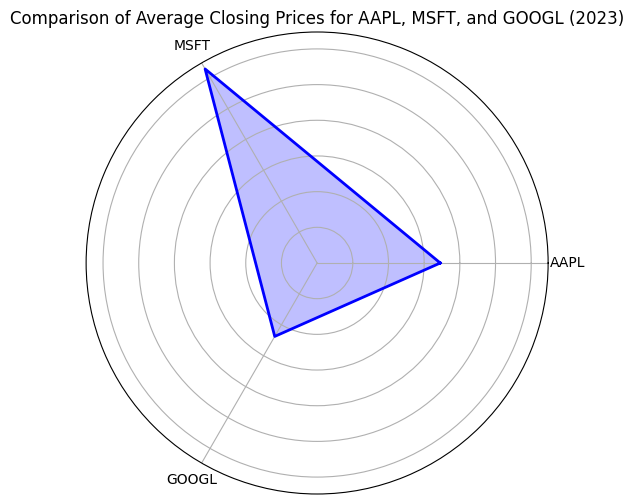

In [ ]:
# Fetch data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']

# Calculate average metrics for each stock
categories = ['AAPL', 'MSFT', 'GOOGL']
values = [
    data['AAPL'].mean(),
    data['MSFT'].mean(),
    data['GOOGL'].mean()
]

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Comparison of Average Closing Prices for AAPL, MSFT, and GOOGL (2023)')
plt.show()


[*********************100%%**********************]  5 of 5 completed


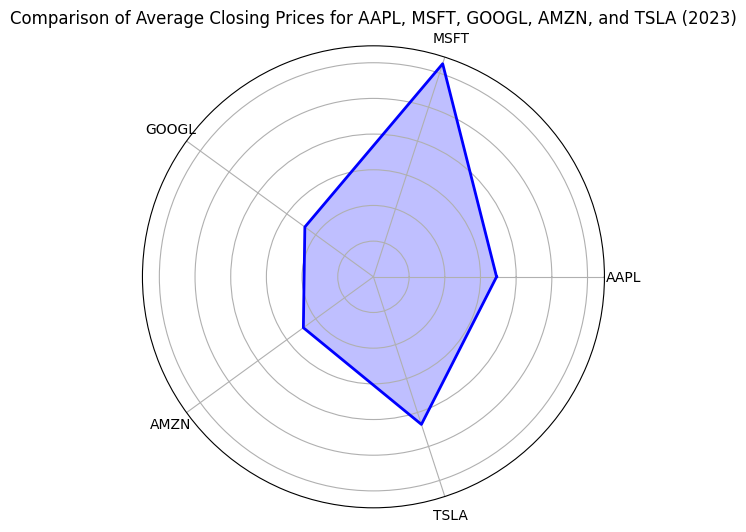

In [ ]:

# Fetch data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']

# Calculate average metrics for each stock
categories = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
values = [
    data['AAPL'].mean(),
    data['MSFT'].mean(),
    data['GOOGL'].mean(),
    data['AMZN'].mean(),
    data['TSLA'].mean()
]

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Comparison of Average Closing Prices for AAPL, MSFT, GOOGL, AMZN, and TSLA (2023)')
plt.show()


## **Pie Chart**

[*********************100%%**********************]  1 of 1 completed


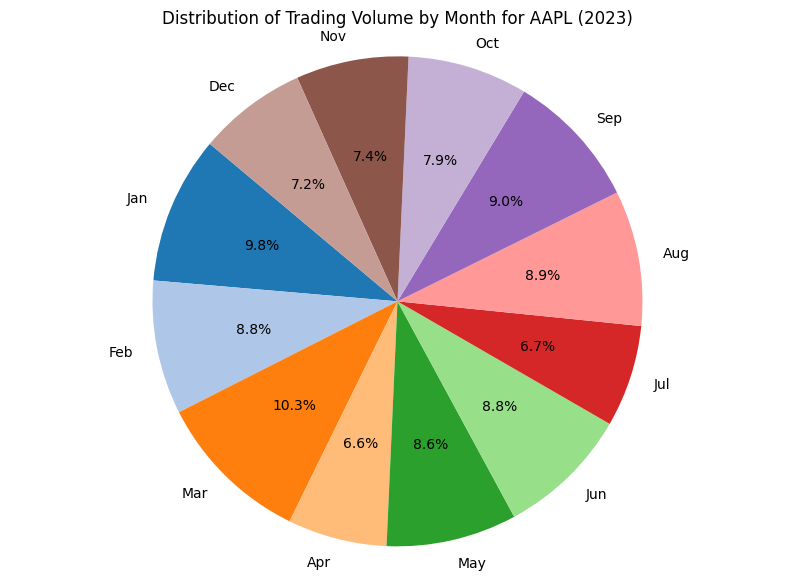

In [ ]:

# Fetch AAPL data from Yahoo Finance
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# Resample to get monthly total trading volume
monthly_volume = data['Volume'].resample('M').sum()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(monthly_volume, labels=monthly_volume.index.strftime('%b'), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Trading Volume by Month for AAPL (2023)')
plt.axis('equal')
plt.show()


## **Heatmap**

[*********************100%%**********************]  1 of 1 completed


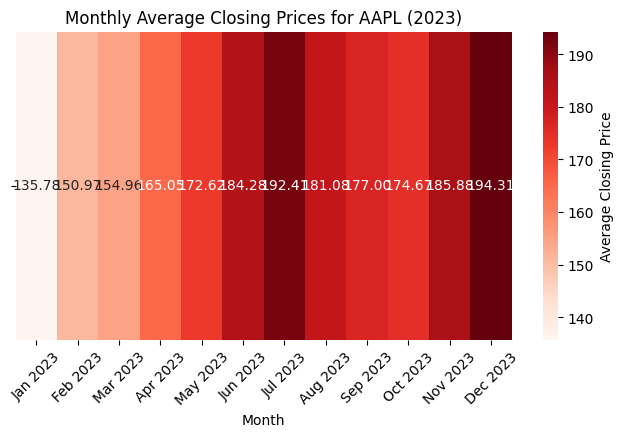

In [ ]:

# Fetch AAPL data from Yahoo Finance
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Extract the closing prices and resample to monthly data
monthly_data = data['Close'].resample('M').mean()

# Create a heatmap of monthly closing prices
plt.figure(figsize=(8, 4))
ax = sns.heatmap(monthly_data.to_frame().T, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Average Closing Price'})

# Set axis labels
ax.set_xlabel('Month')
ax.set_ylabel('')
ax.set_xticklabels(monthly_data.index.strftime('%b %Y'), rotation=45)
ax.set_yticklabels([''], rotation=0)

plt.title('Monthly Average Closing Prices for AAPL (2023)')
plt.show()


## **Area Chart**

[*********************100%%**********************]  1 of 1 completed


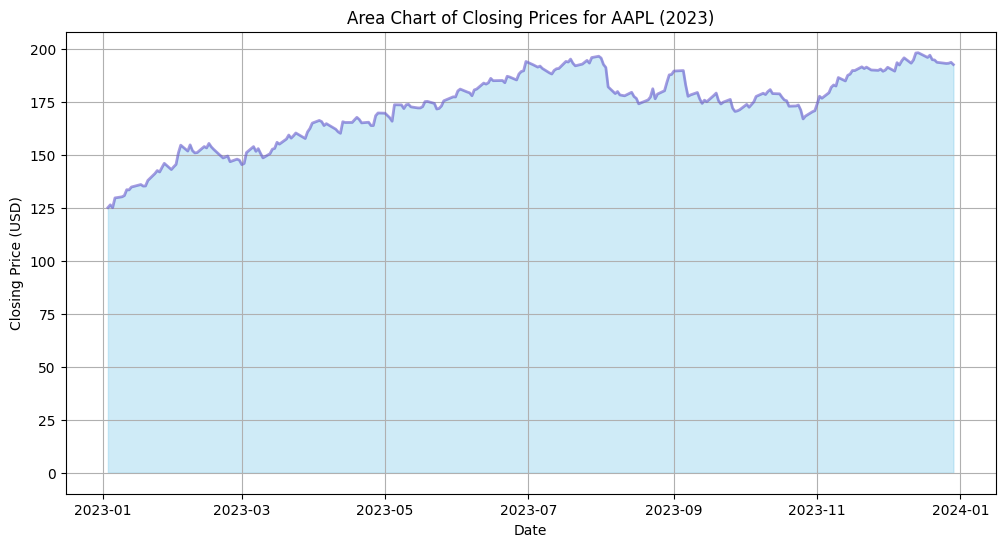

In [ ]:

# Fetch AAPL data from Yahoo Finance
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Extract the closing prices
closing_prices = data['Close']

# Plotting the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(closing_prices.index, closing_prices, color='skyblue', alpha=0.4)
plt.plot(closing_prices.index, closing_prices, color='Slateblue', alpha=0.6, linewidth=2)

# Adding title and labels
plt.title('Area Chart of Closing Prices for AAPL (2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)

# Display the plot
plt.show()


## **Candlestick Chart**

In [ ]:
#!pip install mplfinance

[*********************100%%**********************]  1 of 1 completed


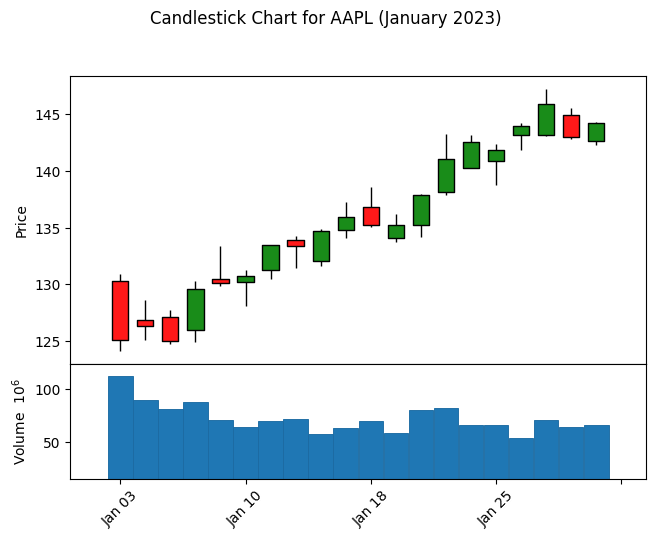

In [ ]:

import mplfinance as mpf

# Fetch AAPL data from Yahoo Finance
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Filter data for a specific month, e.g., January 2023
start_date = '2023-01-01'
end_date = '2023-01-31'
monthly_data = data.loc[start_date:end_date]

# Ensure the index name is set correctly for mplfinance
monthly_data.index.name = 'Date'
monthly_data.columns = [col.capitalize() for col in monthly_data.columns]

# Customizing colors for candlesticks
mc = mpf.make_marketcolors(up='green', down='red', edge='black', wick='black')
s = mpf.make_mpf_style(marketcolors=mc)

# Plotting the candlestick chart for the specific month
mpf.plot(monthly_data, type='candle', volume=True, style=s, title='Candlestick Chart for AAPL (January 2023)')


## **Moving Average Plot**

[*********************100%%**********************]  1 of 1 completed


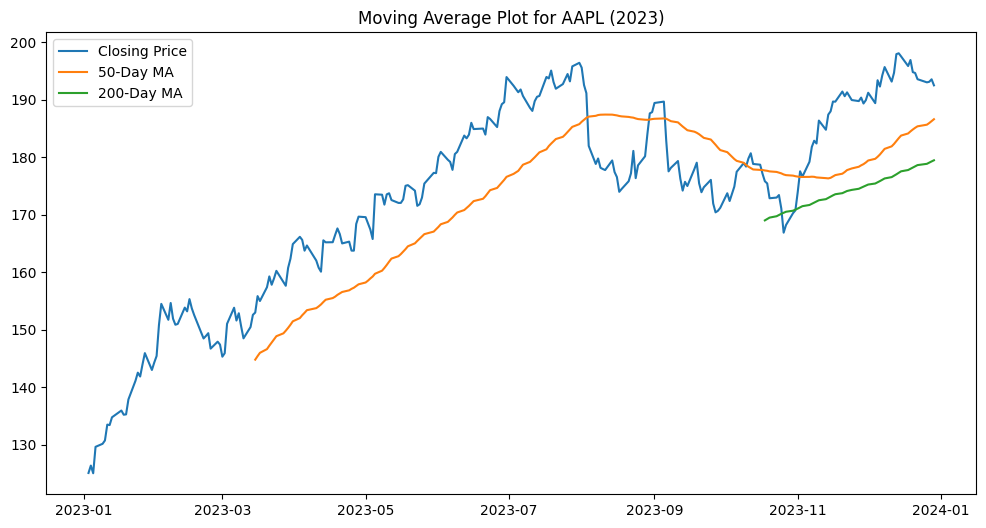

In [ ]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plotting the closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('Moving Average Plot for AAPL (2023)')
plt.legend()
plt.show()


## **Volume Chart**

[*********************100%%**********************]  1 of 1 completed


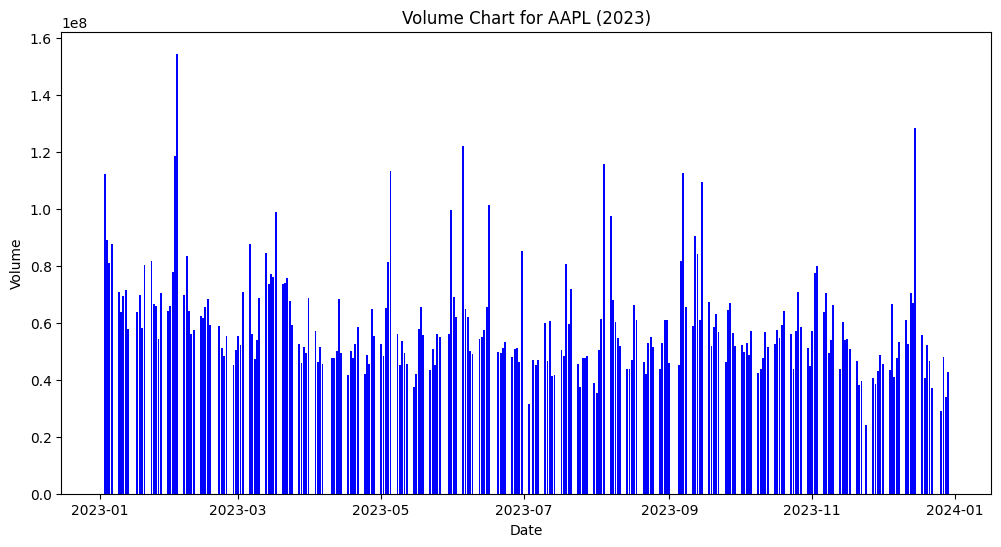

In [ ]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the volume
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue')
plt.title('Volume Chart for AAPL (2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


## **Bollinger Bangs Plot**

[*********************100%%**********************]  1 of 1 completed


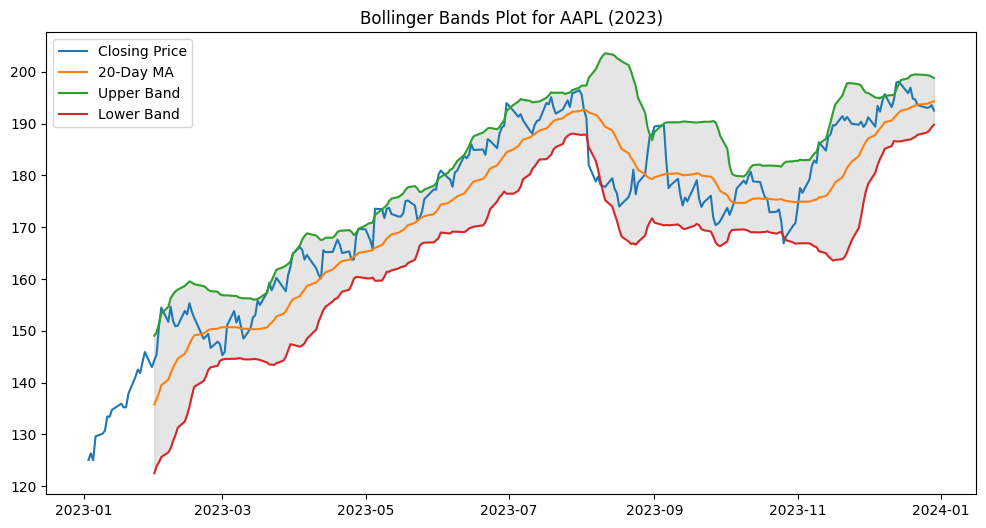

In [ ]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Calculate moving average and standard deviation
data['MA20'] = data['Close'].rolling(window=20).mean()
data['20STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['MA20'] + (data['20STD'] * 2)
data['Lower Band'] = data['MA20'] - (data['20STD'] * 2)

# Plotting the closing prices and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands Plot for AAPL (2023)')
plt.legend()
plt.show()


## **Violin Plot**

[*********************100%%**********************]  1 of 1 completed


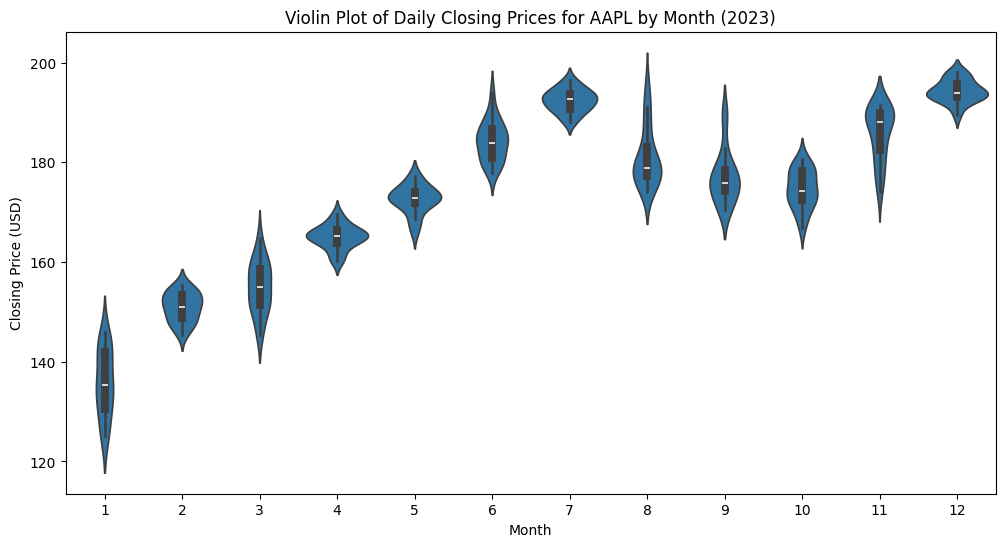

In [ ]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the violin plot for daily closing prices
plt.figure(figsize=(12, 6))
sns.violinplot(x=data.index.month, y=data['Close'])
plt.title('Violin Plot of Daily Closing Prices for AAPL by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.show()


## **Density Plot**

[*********************100%%**********************]  1 of 1 completed
<ipython-input-78-55ea0dbd9d07>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Close'], shade=True, color='blue')


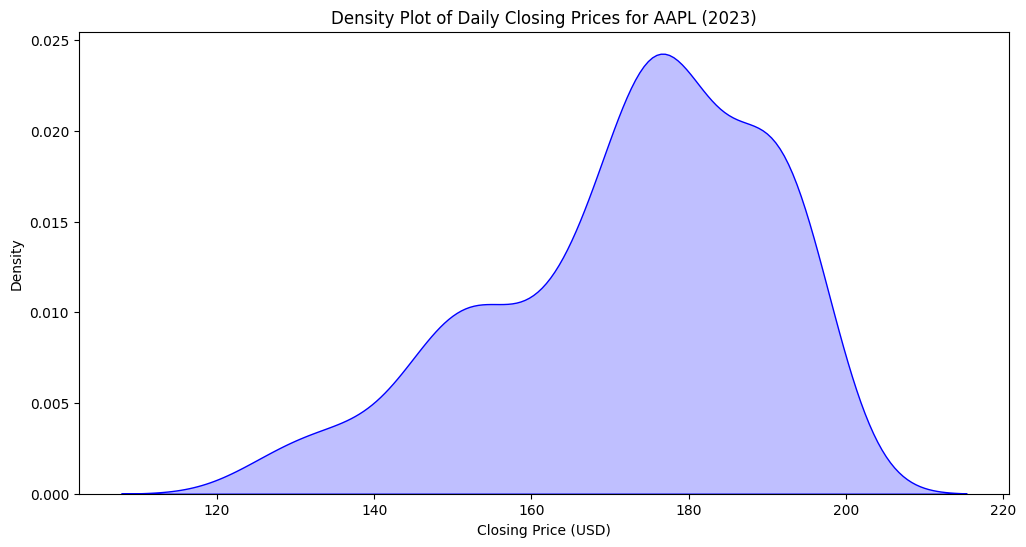

In [ ]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the density plot for daily closing prices
plt.figure(figsize=(12, 6))
sns.kdeplot(data['Close'], shade=True, color='blue')
plt.title('Density Plot of Daily Closing Prices for AAPL (2023)')
plt.xlabel('Closing Price (USD)')
plt.show()


## **Autocorrelation Plot**

[*********************100%%**********************]  1 of 1 completed


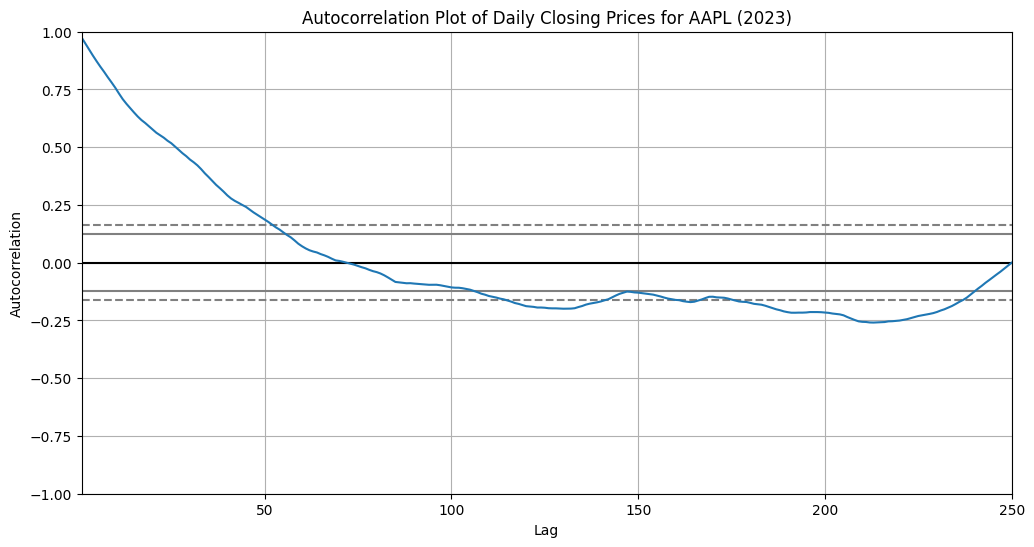

In [ ]:
from pandas.plotting import autocorrelation_plot

data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the autocorrelation plot for daily closing prices
plt.figure(figsize=(12, 6))
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation Plot of Daily Closing Prices for AAPL (2023)')
plt.show()


## **Lag Plot**

[*********************100%%**********************]  1 of 1 completed


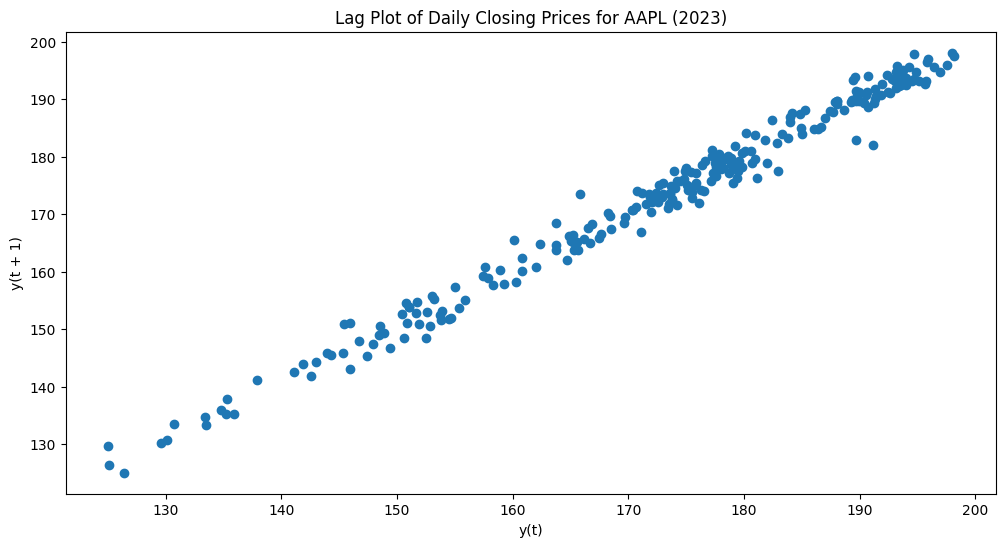

In [ ]:
from pandas.plotting import lag_plot

data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the lag plot for daily closing prices
plt.figure(figsize=(12, 6))
lag_plot(data['Close'])
plt.title('Lag Plot of Daily Closing Prices for AAPL (2023)')
plt.show()


## **Pair Plot**

[*********************100%%**********************]  5 of 5 completed


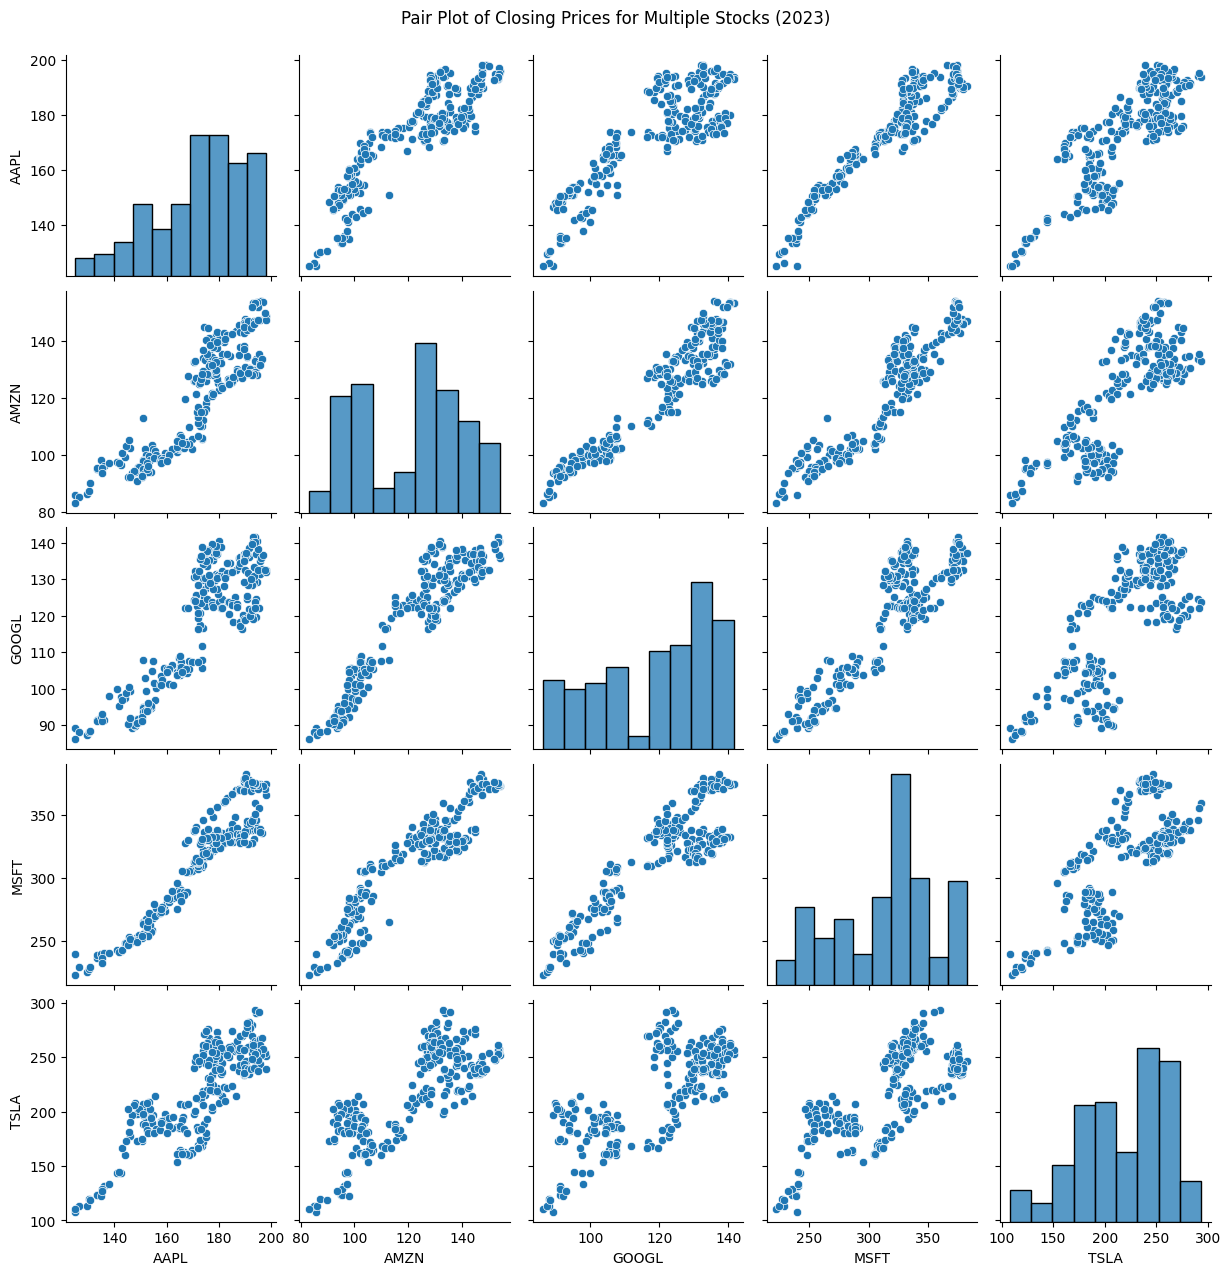

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']

# Plotting the pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot of Closing Prices for Multiple Stocks (2023)', y=1.02)
plt.show()


## **Hexbin Plot**

[*********************100%%**********************]  1 of 1 completed


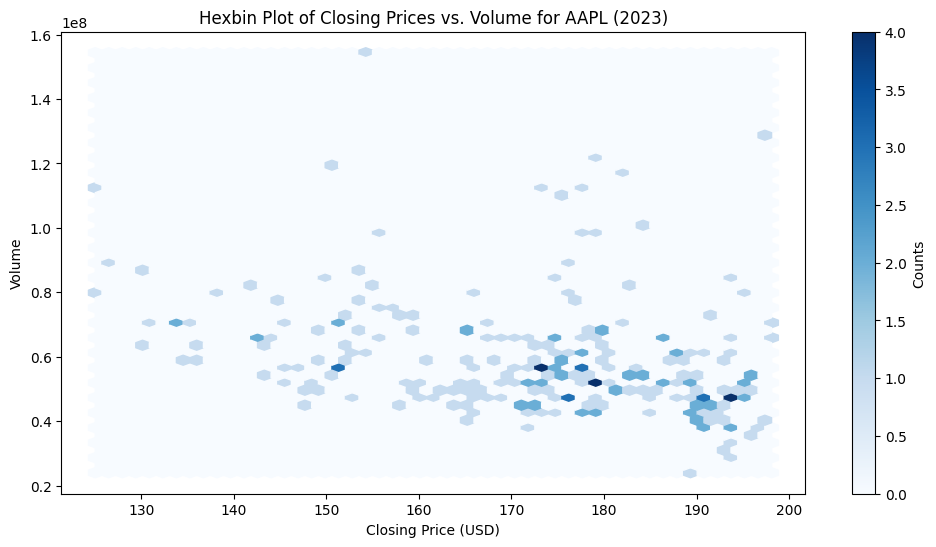

In [2]:
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Plotting the hexbin plot for closing prices vs. volume
plt.figure(figsize=(12, 6))
plt.hexbin(data['Close'], data['Volume'], gridsize=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Closing Prices vs. Volume for AAPL (2023)')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Volume')
plt.show()


## **Sunburst Chart**

In [ ]:
import plotly.express as px

# Fetch AAPL data from Yahoo Finance
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Summarize the data monthly
data['Month'] = data.index.month
data['Year'] = data.index.year
monthly_summary = data.groupby(['Year', 'Month']).mean().reset_index()

# Plotting the sunburst chart
fig = px.sunburst(monthly_summary, path=['Year', 'Month'], values='Close', color='Close',
                  color_continuous_scale='RdBu', title='Sunburst Chart of Monthly Average Closing Prices for AAPL (2023)')
fig.show()


[*********************100%%**********************]  1 of 1 completed


## **Funnel Chart**

In [ ]:
import plotly.express as px

# Fetch AAPL data from Yahoo Finance
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Summarize the data monthly
data['Month'] = data.index.month
data['Year'] = data.index.year
monthly_summary = data.groupby(['Year', 'Month']).mean().reset_index()

# Plotting the funnel chart
fig = px.funnel(monthly_summary, x='Month', y='Close', title='Funnel Chart of Monthly Average Closing Prices for AAPL (2023)')
fig.show()


[*********************100%%**********************]  1 of 1 completed
